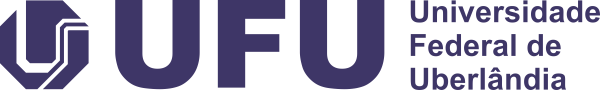

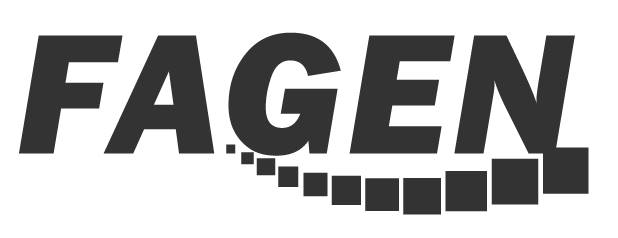

# **Análise Fatorial Exploratória - Python**

## Prof. Dr. José Eduardo Ferreira Lopes

### Introdução

Objetiva-se com este notebook apresentar o processo de <b>Análise Fatorial Exploratória - AFE </b> em Python, destacando os princpais pontos relacionados ao assunto.


### Pontos de Aprendizagem:

> -  Circunstâncias a partir das quais uma análise fatorial pode ser aplicada;<br>
>
> -  <b>Premissas</b> subjacentes à utilização da análise fatorial;<br>
>
> - Diferenciar a análise fatorial das outras técnicas multivariadas;<br>
>
> - O porque e os principais <b>métodos rotacionais</b>;<br>
>
> - <b>Número de fatores</b> a serem extraídos e possíveis nomes;<br>
>
> - Conceitos de <b>cargas fatorias</b> e <b>escores fatoriais</b>;<br>
>
> - Conceitos de <b>eigenvalues</b> (autovalores) e <b>comunalidade</b>;<br>
>
> - Saber estratificar observações a partir de escores fatoriais.<br>


### Definições e Conceitos:

Análise Fatorial é um nome genérico dado a uma classe de métodos estatísticos multivariados cujo propósito principal é definir a estrutura subjacente em uma matriz de dados. Assim, têm-se os seguintes pontos:<br>
> - Abordar o problema de analisar a estrutura das inter-relações (correlações) entre um grande número de variáveis, definindo um conjunto de dimensões latentes comuns, chamadas de fatores;<br>
> - Identificar as dimensões separadas da estrutura e então determinar o grau em que cada variável é explicada por cada dimensão;
Resumir e reduzir os dados em dimensões latentes interpretáveis e compreensíveis usando escores para cada dimensão e, consequentemente, substituir as variáveis originais.<br>
> - Os modelos de análise fatorial buscam explicar o comportamento das variáveis observadas em relação ao comportamento de um conjunto de variáveis não observadas (variáveis latentes ou fatores).




### Fonte de pesquisa - Introdução à Análise Fatorial em Python

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

### Bibliotecas utilizadas

<p>As principais bibliotecas utilizadas são:<br>
<a href="https://pandas.pydata.org/">Pandas</a>;<br>
<a href="https://matplotlib.org/">Matplotlib</a>;<br>  
<a href="https://factor-analyzer.readthedocs.io/en/latest/index.html">factor_analyzer</a>;<br>
<a href="https://docs.scipy.org/doc/scipy/reference/tutorial/index.html">scipy</a><br>
</p>


In [375]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy import stats as st
import researchpy as rs
from factor_analyzer import FactorAnalyzer as fa
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo
from scipy.stats import shapiro

pd.set_option("display.max_columns", 101)

In [376]:
#!pip install researchpy

In [377]:
#!pip install factor_analyzer

### Dados

Os dados aqui utilizados acompnham o livro-texto do Hair jr. HAIR JR., J. F. et al. <b>Análise Multivariada de Dados</b>. 6. ed. Bookman: Porto Alegre, 2009. O arquivo de dados se chama HBAT e contém informações a respeito de pesquisa respondida pelos clientes, avaliando atributos/características da empres HBAT.<br>

<pre>
ID - Identificador do Cliente              X1 - Longevidade do Cliente
X2 - Tipo de Indústria                     X3 - Tamanho da Empresa
X4 - Região                                X5 - Sistema de Distribuição
X6 - Qualidade do Produto                  X7 - Atividades de E-Comerce
X8 - Suporte Técnico                       X9 - Resolução de Reclamações
X10 - Propaganda                           X11 - Linha de Produtos
X12 - Imagem da Força de Vendas            X13 - Preços Competitivos
X14 - Garantias                            X15 - Novos Produtos
X16 - Pedidos e Faturamento                X17 - Flexibilidade de Preços
X18 - Velocidade de Entrega                X19 - Satisfação
X20 - Recomendaria                         X21 - Recompraria
X22 - Nível de Compra                      X23 - Consideraria Aliança Estratégica
</pre>

Da variável X6 Até a variável X18, representam a nota que cada um dos clientes pesquisados atribuíram para os respectivos atributos. Notas entre 0 e 10.

<p>Leitura / Carga da planilha de Clientes do Excel: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel/">read_excel</a>
</p>

In [380]:
df = pd.read_excel("HBAT.xlsx", sheet_name = "HBAT")

<p>Visualização de n primeiras linhas do arquivo (head): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head()</a><br>
</p>

Por *_default_*, são apresenadas as cinco primeiras linhas. Ao passar o parâmetro, serão exibidas as n primieras linhas.

In [383]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1,Entre 1 e 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,Sim
1,2,Acima de 5 Anos,Indústria de Jornal,Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,Não
2,3,Acima de 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,Sim


<p>Resumo do arquivo (info): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">info()</a><br>
Valores e Tipo de Dados
</p>

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   x1      100 non-null    object 
 2   x2      100 non-null    object 
 3   x3      100 non-null    object 
 4   x4      100 non-null    object 
 5   x5      100 non-null    object 
 6   x6      100 non-null    float64
 7   x7      100 non-null    float64
 8   x8      100 non-null    float64
 9   x9      100 non-null    float64
 10  x10     100 non-null    float64
 11  x11     100 non-null    float64
 12  x12     100 non-null    float64
 13  x13     100 non-null    float64
 14  x14     100 non-null    float64
 15  x15     100 non-null    float64
 16  x16     100 non-null    float64
 17  x17     100 non-null    float64
 18  x18     100 non-null    float64
 19  x19     100 non-null    float64
 20  x20     100 non-null    float64
 21  x21     100 non-null    float64
 22  x22

### Análise

Observar que a variável X6 é do tipo **object**, enquanto o esperado seria **float64**

Verificar os valores da variável.

In [388]:
df["x6"].value_counts()

x6
8.7     6
9.3     6
6.4     5
9.9     5
6.7     4
9.1     4
5.7     4
8.5     4
8.0     3
8.6     3
7.6     3
8.2     3
6.9     3
9.4     3
9.2     3
7.7     3
7.4     2
7.9     2
10.0    2
9.6     2
5.9     2
5.5     2
7.5     2
6.1     2
7.1     2
6.5     2
9.0     2
8.8     1
8.4     1
5.0     1
6.6     1
6.0     1
5.1     1
8.3     1
8.1     1
7.0     1
5.2     1
5.6     1
6.3     1
9.5     1
5.8     1
6.2     1
7.8     1
Name: count, dtype: int64

Observar que existe um valor do tipo *string* enquanto o esperado é *float*. Este valor pode ser substituído por **10**, dado que a escala de coleta de dados variáva entre 1 e 10, sendo que 10 correspondia à nota **Excelente**


Substituir o valor encntrado **Excelente** por 10 e alterar o tipo de dado.

In [391]:
df["x6"] = df["x6"].replace('Excelente', '10')

In [392]:
df["x6"] = df["x6"].astype("float64")

## Exploração dos Dados

### Estatística Descritiva

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">describe()</a> <br>
</p>

A função describe() gera as estatísticas descritivas que sumarizam a tendência central, dispersão e forma de distribuição de um conjunto de dados. <br>
Por padrão, as estatísticas geradas são para variáveis métricas. com o parâmetro <b>include='all'</b>, são geradas as estatísticas para todos os tipos de variáveis.



In [395]:
df.describe().round(2)

,id,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,7.81,3.67,5.36,5.44,4.01,5.80,5.12,6.97,6.04,5.15,4.28,4.61,3.89,6.92,7.02,7.71,58.40
std,29.01,1.40,0.70,1.53,1.21,1.13,1.32,1.07,1.55,0.82,1.49,0.93,1.21,0.73,1.19,1.04,0.94,8.86
min,1.00,5.00,2.20,1.30,2.60,1.90,2.30,2.90,3.70,4.10,1.70,2.00,2.60,1.60,4.70,4.60,5.50,37.10
25%,25.75,6.57,3.28,4.25,4.60,3.18,4.70,4.50,5.88,5.40,4.10,3.70,3.70,3.40,6.00,6.30,7.10,51.10
50%,50.50,8.00,3.60,5.40,5.45,4.00,5.75,4.90,7.10,6.10,5.00,4.40,4.35,3.90,7.05,7.00,7.70,58.60
75%,75.25,9.10,3.92,6.62,6.32,4.80,6.80,5.80,8.40,6.60,6.30,4.80,5.60,4.43,7.62,7.60,8.40,65.35
max,100.00,10.00,5.70,8.50,7.80,6.50,8.40,8.20,9.90,8.10,9.50,6.70,7.30,5.50,9.90,9.90,9.90,77.10


In [396]:
df["x6"].quantile(q=0.05)

5.595

### Distribuição dos Dados - BoxPlot e Histograma

Valendo-se destes três gráficos, é possível fazer uma inspeção visual na distribuição das variáveis (forma). É possível observar assimetria, espalhamento (curtose), outliers e possível ajuste/desvio da distribuição normal.

#### Quantil-Quantil Plot

Também conhecido por **Q-Q plot** ou **QQ plot**

É gerada uma distribuição idealizada e então, comparada com a distribuição da variável em questão, neste caso, a distribuição Gaussiana (Normal). <br>

A distribuição idealizada é dividida em grupos (ex.: 5 grupos), chamada quintis. Cada ponto da amostra é pareado com o membro similar da distribuição idealizada a partir da distribuição acumulada. <br>

O resultado é plotado como um gráfico de dispersão com a distribuição idealizada no eixo x e variável testada no eixo y. <br>

Além dos pontos, é traçada uma linha, formando um ângulo de 45 graus, cujo objetivo é facilitar a análise. Quando os pontos desviam da da distribuição esperada (os pontos plotados distanciam da linha traçada), indicam possível desvio da distribuição normal.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

<p> Funções Utilizadas: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting">plot()</a> <br>
<a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">qqplot()</a> <br>
</p>

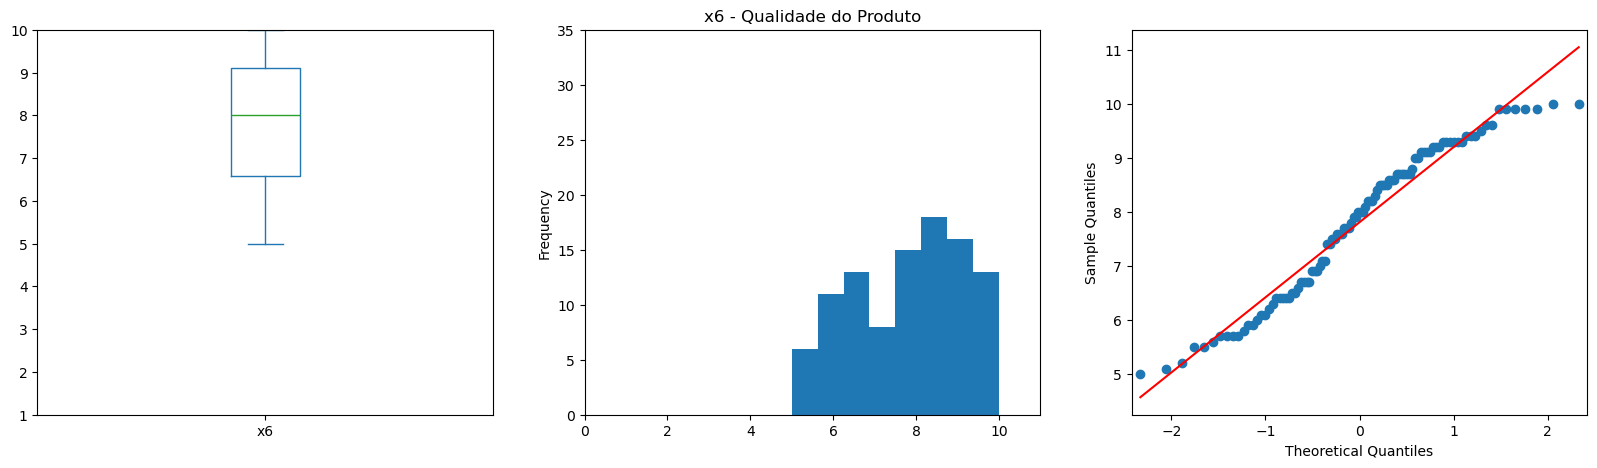

In [398]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x6"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x6"].plot(kind = 'hist', bins=8, ax=axes[1], xlim=(0, 11), title='x6 - Qualidade do Produto').set_ylim(0, 35)
qqplot(df["x6"], line='s', ax=axes[2])
plt.show()

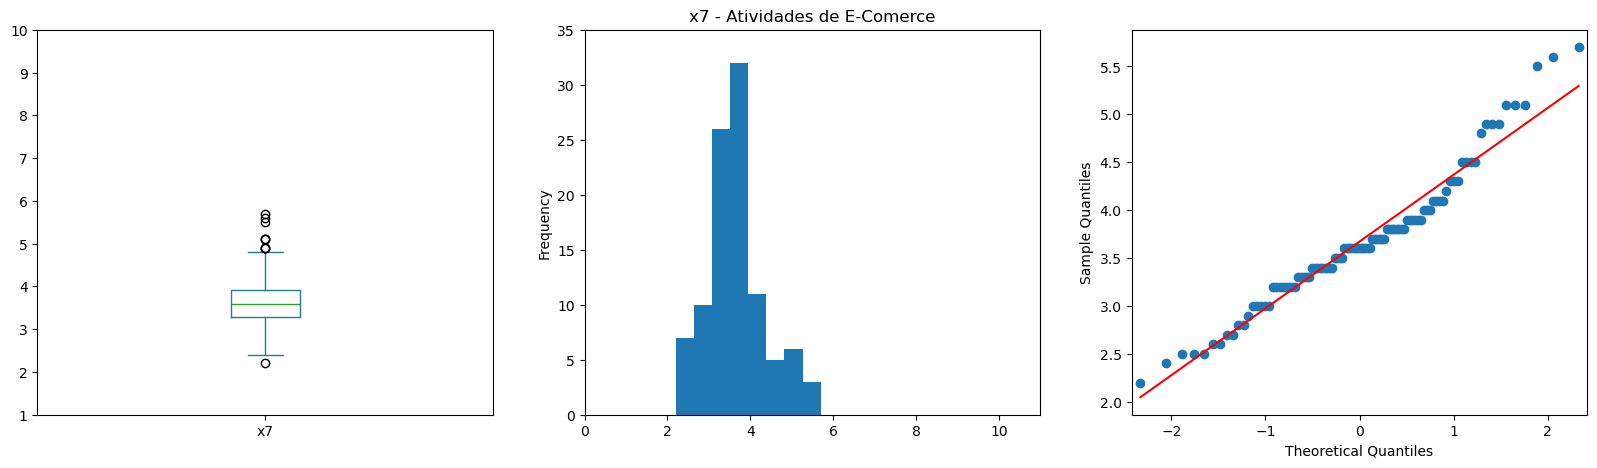

In [399]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x7"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x7"].plot(kind = 'hist', bins=8, ax=axes[1], xlim=(0, 11), title='x7 - Atividades de E-Comerce').set_ylim(0, 35)
qqplot(df["x7"], line='s', ax=axes[2])
plt.show()

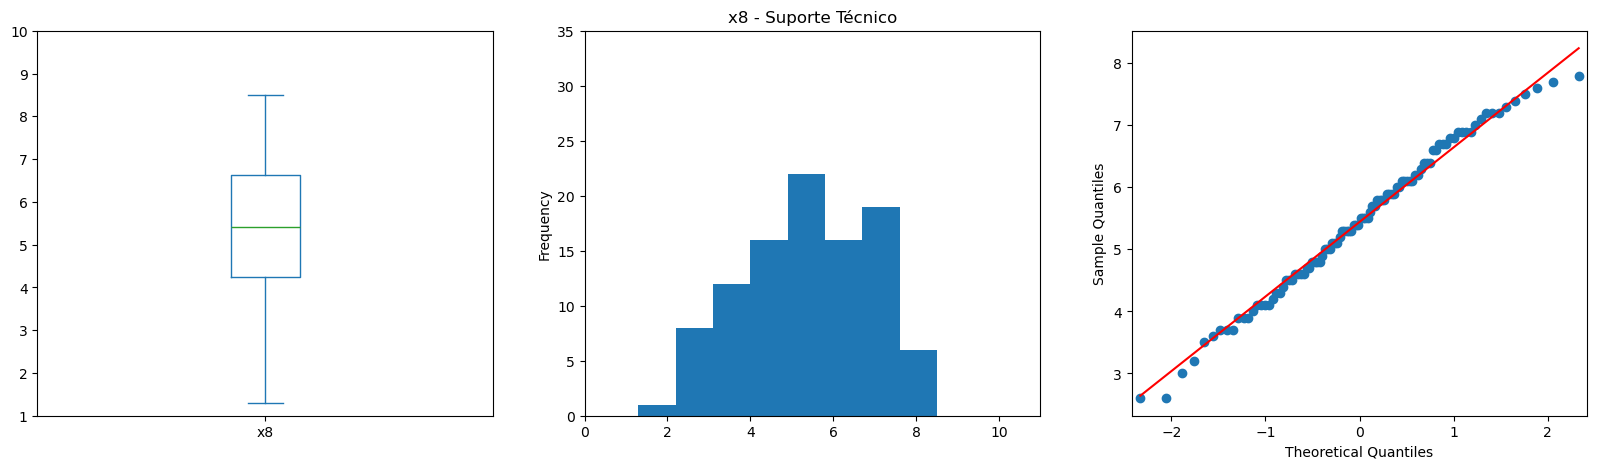

In [400]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x8"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x8"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x8 - Suporte Técnico').set_ylim(0, 35)
qqplot(df["x9"], line='s', ax=axes[2])
plt.show()

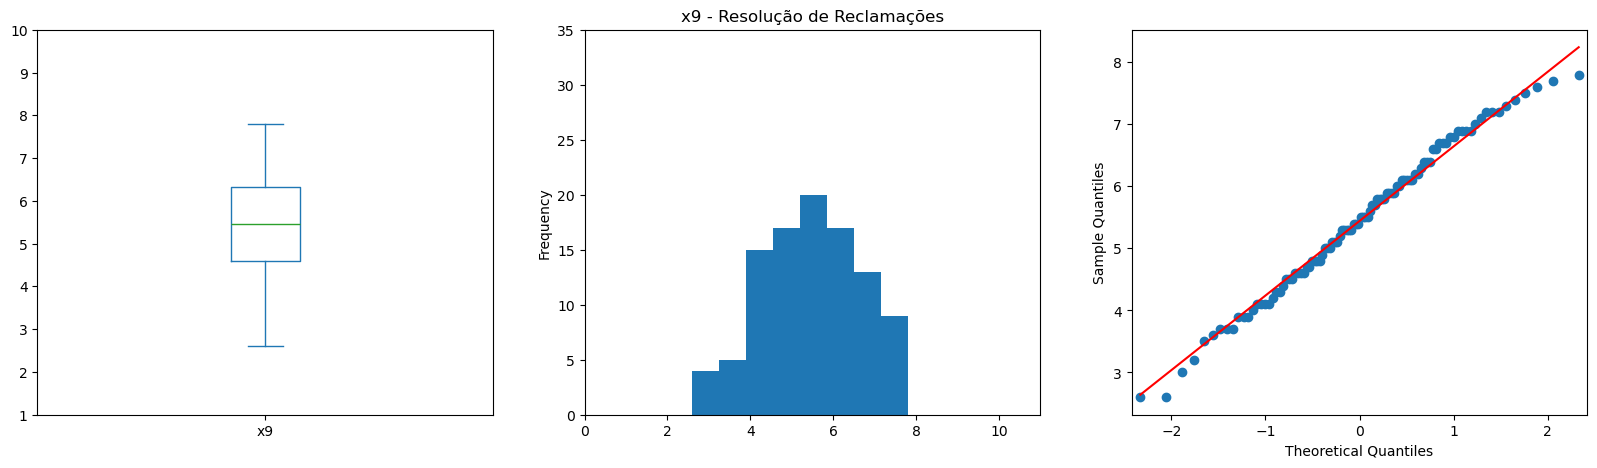

In [401]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x9"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x9"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x9 - Resolução de Reclamações').set_ylim(0, 35)
qqplot(df["x9"], line='s', ax=axes[2])
plt.show()

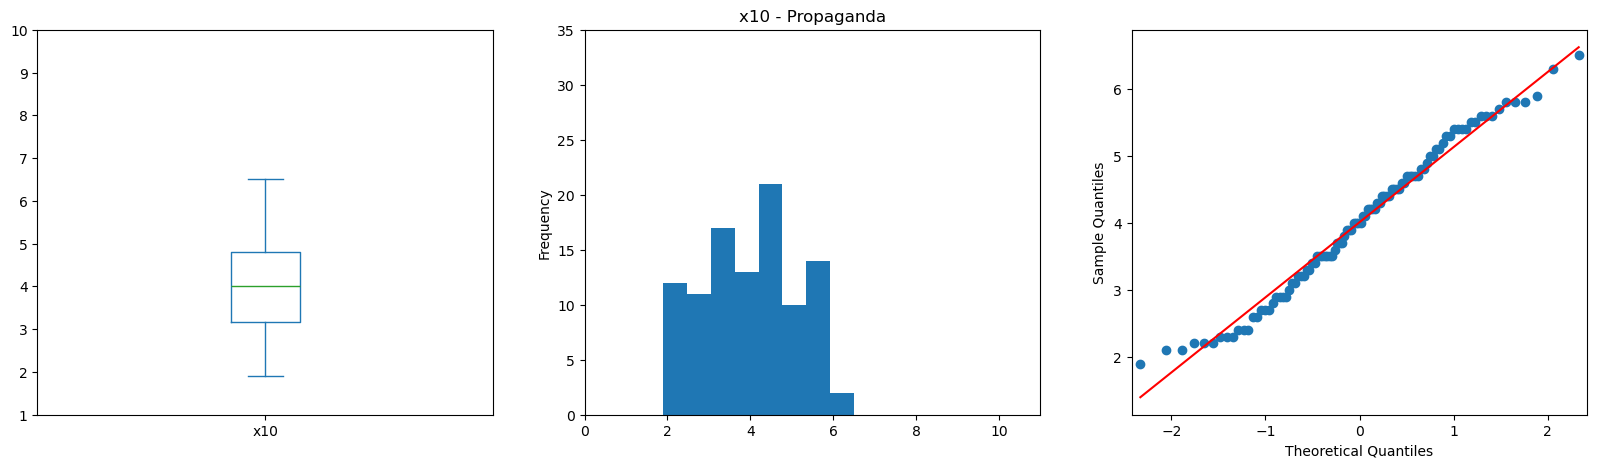

In [402]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x10"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x10"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x10 - Propaganda').set_ylim(0, 35)
qqplot(df["x10"], line='s', ax=axes[2])
plt.show()

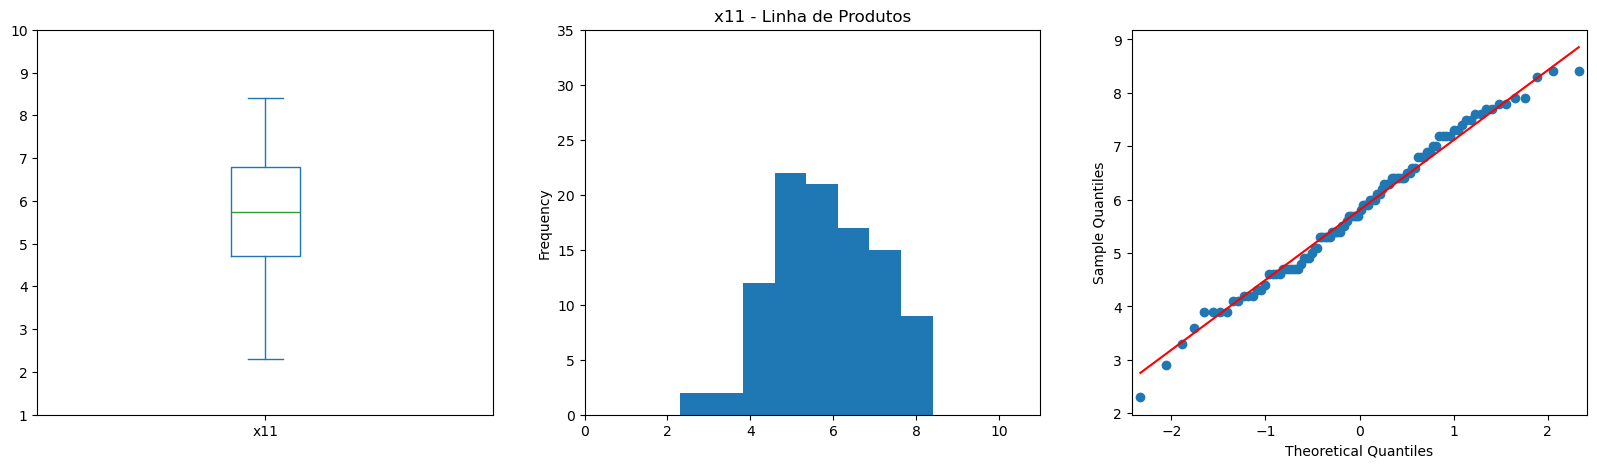

In [403]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x11"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x11"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x11 - Linha de Produtos').set_ylim(0, 35)
qqplot(df["x11"], line='s', ax=axes[2])
plt.show()

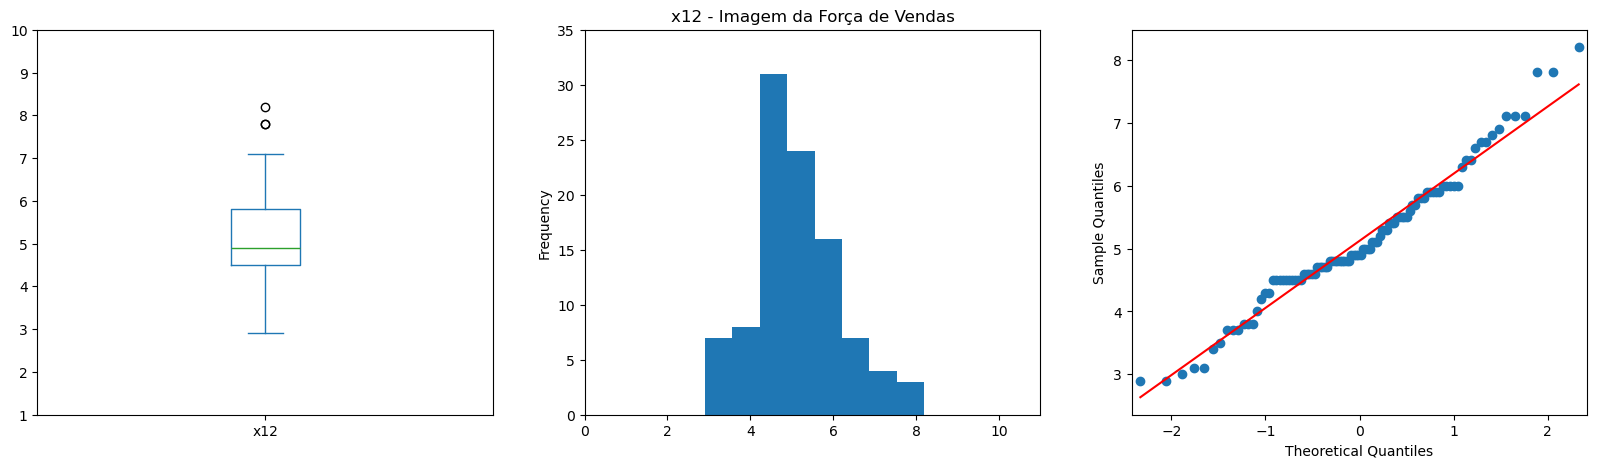

In [404]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x12"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x12"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x12 - Imagem da Força de Vendas').set_ylim(0, 35)
qqplot(df["x12"], line='s', ax=axes[2])
plt.show()

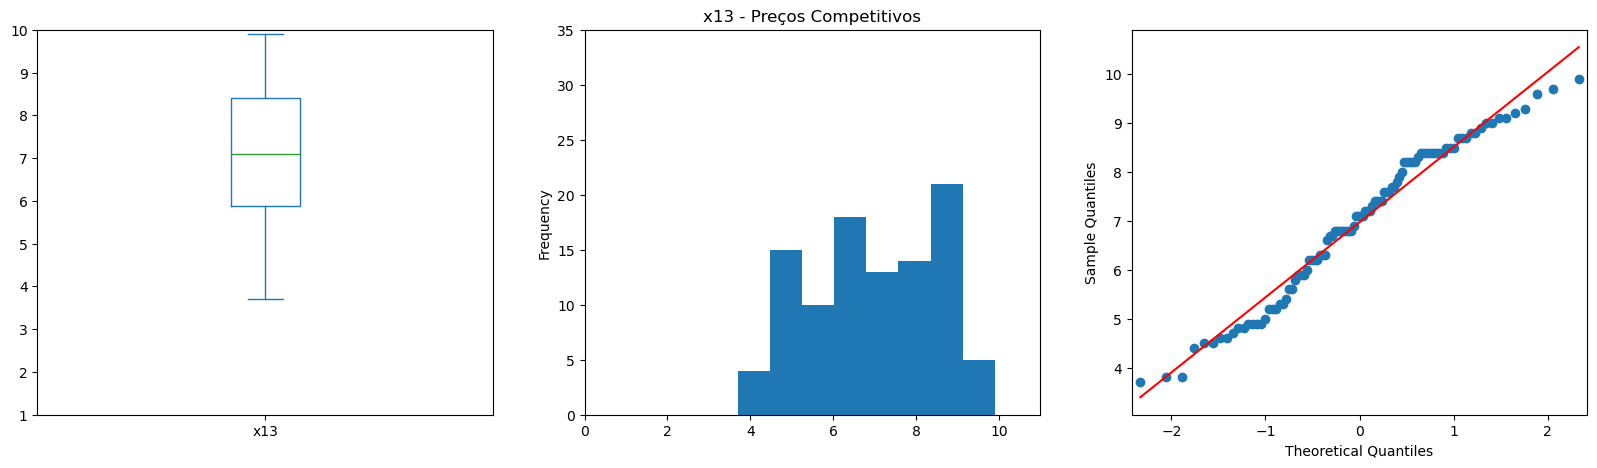

In [405]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x13"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x13"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x13 - Preços Competitivos').set_ylim(0, 35)
qqplot(df["x13"], line='s', ax=axes[2])
plt.show()

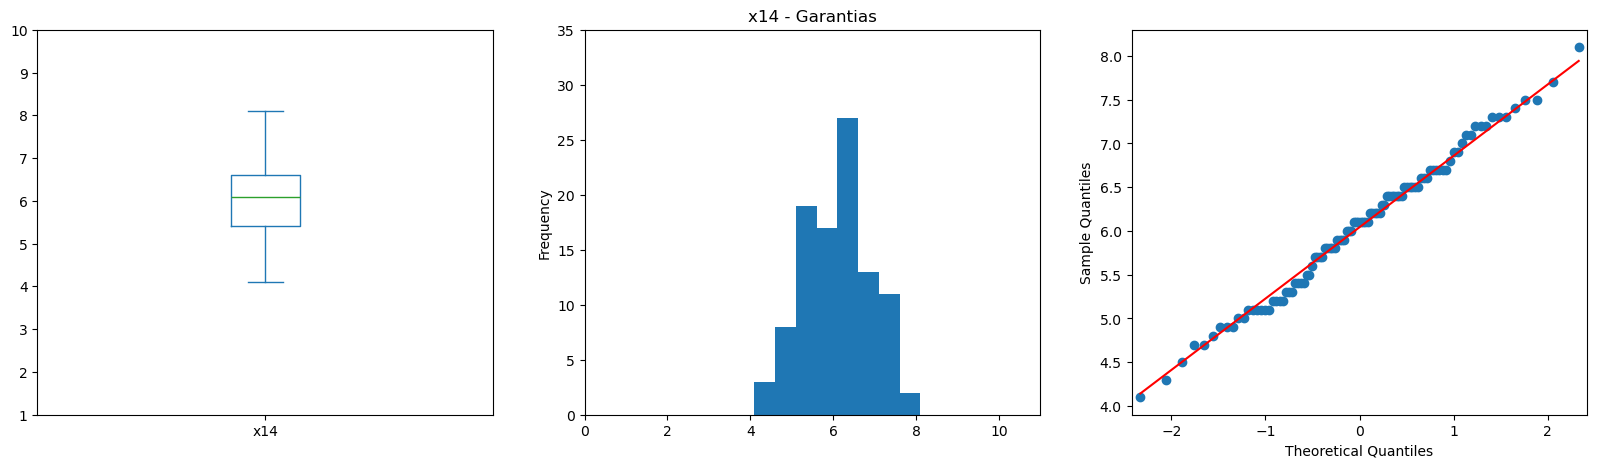

In [406]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x14"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x14"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x14 - Garantias').set_ylim(0, 35)
qqplot(df["x14"], line='s', ax=axes[2])
plt.show()

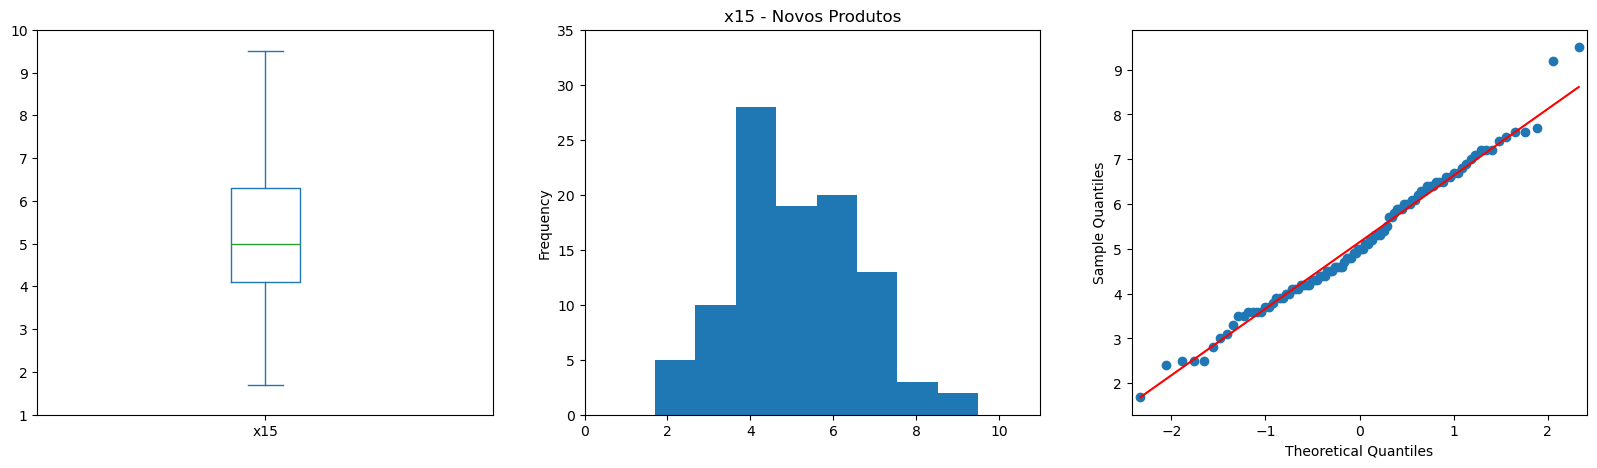

In [407]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x15"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x15"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x15 - Novos Produtos').set_ylim(0, 35)
qqplot(df["x15"], line='s', ax=axes[2])
plt.show()

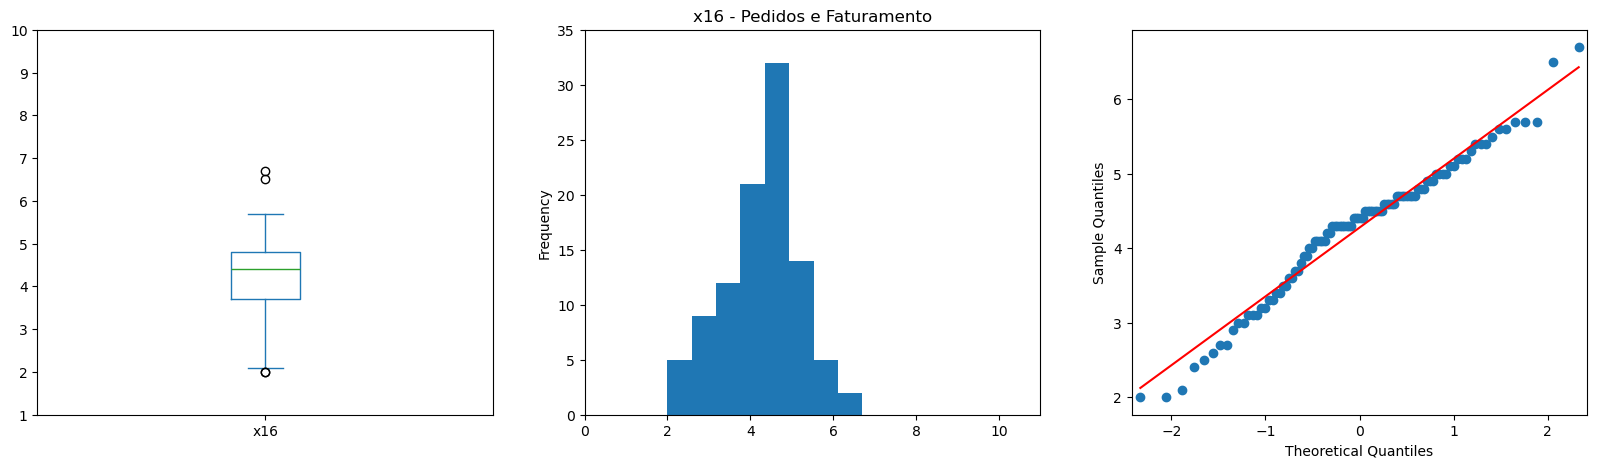

In [408]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x16"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x16"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x16 - Pedidos e Faturamento').set_ylim(0, 35)
qqplot(df["x16"], line='s', ax=axes[2])
plt.show()

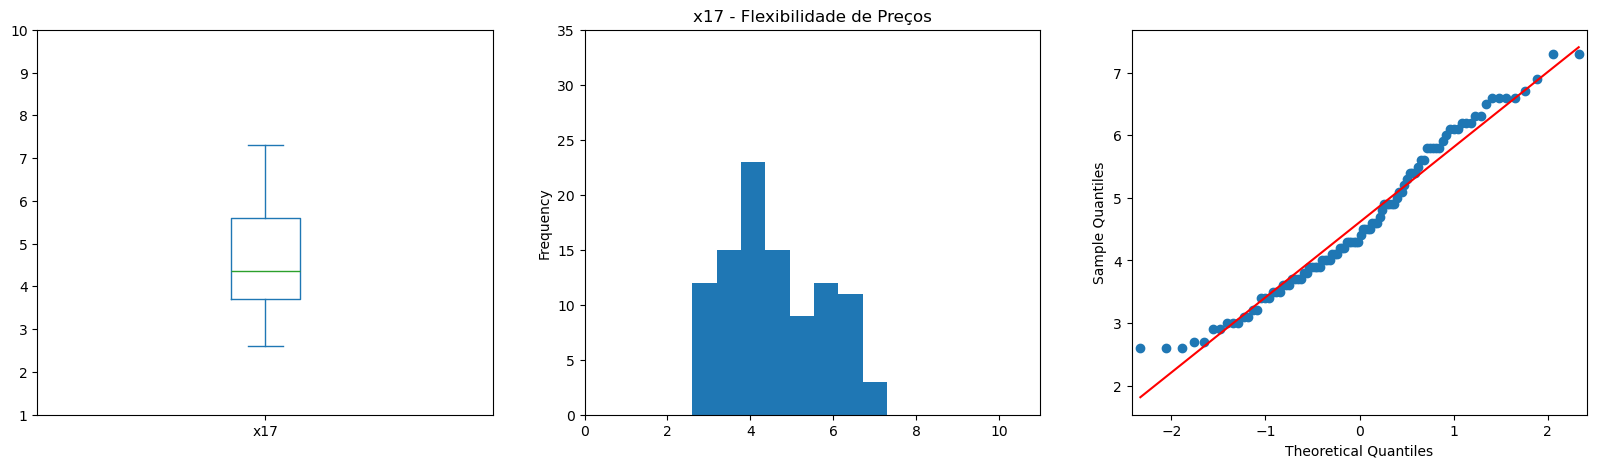

In [409]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x17"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x17"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x17 - Flexibilidade de Preços').set_ylim(0, 35)
qqplot(df["x17"], line='s', ax=axes[2])
plt.show()

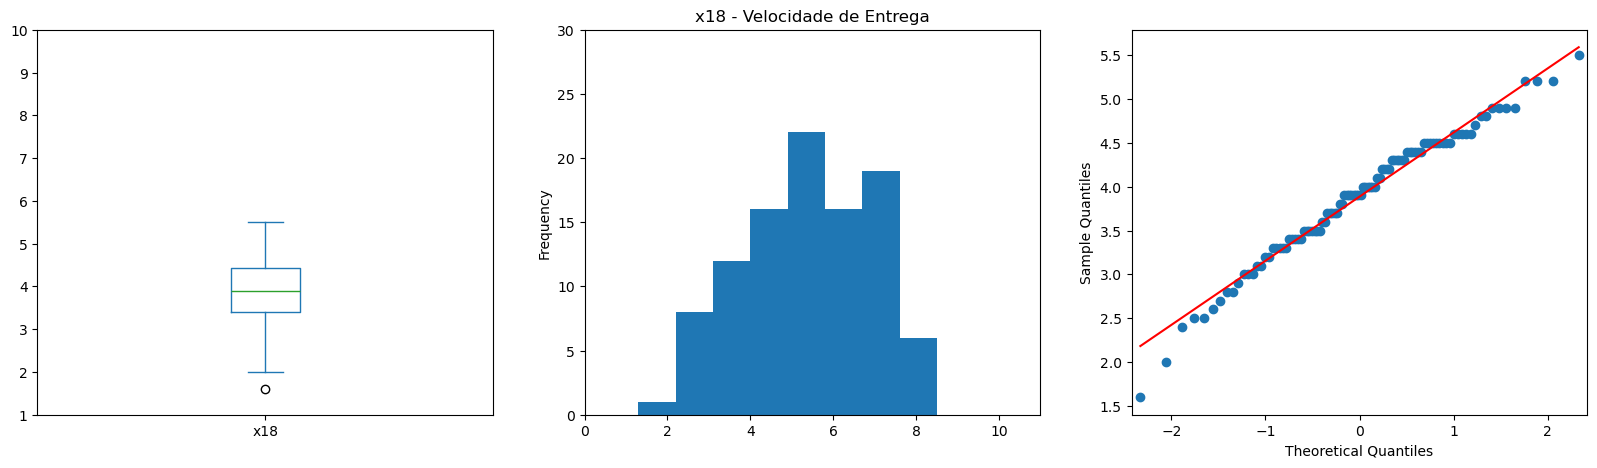

In [410]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x18"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x8"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x18 - Velocidade de Entrega').set_ylim(0, 30)
qqplot(df["x18"], line='s', ax=axes[2])
plt.show()

#### Análise

Analisando as figuras, é possível observar: Em relação à variável x6 - Qualidade do Produto, que oe valores são altos, sendo o atributo, bem avaliado pelos clientes e não se observa presença de *outliers*. Em relação à variável x7 - Atividades de E-Comerce, as notas são baixas, sendo o atributo, mal avaliado pelos clientes. É possível observar que há presença de *outliers* e nos dois casos, os pontos plotados no QQ plot se distancial da linha, indicando possível desvio da normalidade.


## Normalidade dos Dados

A partir da análise gráfica, é possível observar possíveis violações da normalidade. Contudo, testes devem ser conduzidos para certificar esta possibilidade.<br>

Existem muitos testes que podem ser utilizados para avaliar o quanto a dsitribuição de uma determinada amostra se parece com a distribuição Gaussiana (normal). Cada um dos testes abordam diferentes pressupostos e aspectos dos dados.

#### Interpretação dos Testes de Normalidade

Cada teste retorna ao menos dois parâmetros:

> - Estatística: Um valor calculado que pode ser interpretado comparando-o com algum valor crítico de uma distribuição estatística de deste.
> - p-valor: Usado para interpretar o teste. Neste caso, o quanto a distribuição se aproxima de uma distribuição normal.<br>

Para analisar a estatísitca calculada, requer maior profundidade e proficiência em estatística e no teste estatístico específico. Em contrapartida, o p-valor é mais simples e prático para analisar.<br>

O teste assume que a amostra provem de uma distribuição normal. Tecnicamente, chamada de hipótese nula ou H0. O nível de confiança, chamado alfa, tipicamente 5% (ou 0,05), é usado para intepretar o p-valor.

> - p <= alfa: Rejeita H0, distribuição não normal
> - p > alfa: Falha em rejeitar H0, distribuição normal

Em gereal, estamos procurando por p-valores maiores que alfa, confirmando que a distribuição da amostra provém de uma distribuição normal.


In [413]:
# Cáculo do N (Listwise), Curtose e Assimetria para cada uma das variáveis

Normal = pd.DataFrame({'N': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].count(),
                     'Curtose': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].kurtosis(),
                     'Assimetria': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].skew()})

In [414]:
Normal.round(4)

,N,Curtose,Assimetria
x6,100,-1.1318,-0.2445
x7,100,0.7353,0.6604
x8,100,-0.5482,-0.2033
x9,100,-0.5859,-0.1358
x10,100,-0.8876,0.0436
x11,100,-0.5218,-0.0924
x12,100,0.4095,0.3769
x13,100,-0.9034,-0.2399
x14,100,-0.4447,0.0084
x15,100,0.0164,0.2985


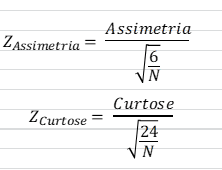

### Normalidade: Análise de Assimetria e Curtose - Valores Padronizados

A partir da assimetria e curtose, calcula-se a assimetria e curtose padronizados e compare-se este valor com os valores críticos de z.

>Valores críticos de 𝑧:<br>
>> - 𝑧= ±2,58 (𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐â𝑛𝑐𝑖𝑎 𝑑𝑒 0,01)<br>
>> - 𝑧= ±1,96 (𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐â𝑛𝑐𝑖𝑎 𝑑𝑒 0,05)<br>

Se o valor 𝑧 calculado exceder o valor crítico especificado, então a distribuição é não-normal<br>

### Normalidade: Teste K^2 de D’Agostino

A partir da curtose e da assimetria, determina se uma distribuição provém de uma distribuição normal.

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">normaltest()</a> <br>
</p>

### Normalidade:Teste KS - Kolmogorov-Smirnov

Este teste avalia se uma dada distribuição para uma variável randômica se aproxima da distribuição da variável analisada.

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html">kstest()</a> <br>
</p>


### Normalidade:Teste W - Shapiro-Wilk

Testa a hipótese nulal de que os dados provém de uma distribuição normal.

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html">shapiro()</a> <br>
</p>

In [417]:
# Cáculo da Curtose e Assimetria padronizadas para cada uma das variáveis
Normal['Z_Curtose'] = Normal['Curtose'] / np.sqrt(24/Normal['N'])
Normal['Z_Assimetria'] = Normal['Assimetria'] / np.sqrt(6/Normal['N'])

In [418]:
colunas = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']

In [419]:
# Cálculo da estatísticas e p-valores para os teste K^2 de D’Agostino, ks e w
j = 0
while j < len(colunas):
    Normal.at[colunas[j], 'normal_qui'] = st.normaltest(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_qui'] = st.normaltest(df[colunas[j]])[1]
    Normal.at[colunas[j], 'ks'] = st.kstest(df[colunas[j]], 'norm')[0]
    Normal.at[colunas[j], 'p-valor_ks'] = st.kstest(df[colunas[j]], 'norm')[1]
    Normal.at[colunas[j], 'w'] = shapiro(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_w'] = shapiro(df[colunas[j]])[1]
    
    j +=1

In [420]:
Normal.round(4)

,N,Curtose,Assimetria,Z_Curtose,Z_Assimetria,normal_qui,p-valor_qui,ks,p-valor_ks,w,p-valor_w
x6,100,-1.1318,-0.2445,-2.3104,-0.9982,26.1400,0.0000,1.0000,0.0,0.9497,0.0008
x7,100,0.7353,0.6604,1.5010,2.6960,8.9967,0.0111,0.9861,0.0,0.9585,0.0032
x8,100,-0.5482,-0.2033,-1.1191,-0.8298,2.6773,0.2622,0.9838,0.0,0.9863,0.3900
x9,100,-0.5859,-0.1358,-1.1959,-0.5544,2.6962,0.2597,0.9953,0.0,0.9865,0.4023
x10,100,-0.8876,0.0436,-1.8118,0.1780,9.2436,0.0098,0.9721,0.0,0.9763,0.0677
x11,100,-0.5218,-0.0924,-1.0651,-0.3774,1.8237,0.4018,0.9893,0.0,0.9869,0.4324
x12,100,0.4095,0.3769,0.8359,1.5387,3.3971,0.1829,0.9981,0.0,0.9740,0.0453
x13,100,-0.9034,-0.2399,-1.8441,-0.9795,10.8593,0.0044,0.9999,0.0,0.9676,0.0145
x14,100,-0.4447,0.0084,-0.9077,0.0342,1.0420,0.5939,1.0000,0.0,0.9909,0.7404
x15,100,0.0164,0.2985,0.0335,1.2187,1.6278,0.4431,0.9818,0.0,0.9860,0.3728


### Análise da Normalidade

Ao observar os testes de normalidade, considerando a Curtose e Assimetria padronizados (Z_Curtose  Z_Assimetria), a um nível de significância de 0,05, as variáveis x6 e x7 violam a condição de normalidade. Contudo, a um nível de significância de 0,01, apenas a variável X7 viola a condição de normalidade.<br>
Considerando o teste K^2 de D’Agostino, as variáveis X6, X7, X10, X13 e X17 violam o pressuposto de normalidade.<br>
Considerando o KS, todos as variáveis violam o pressuposto de normalidade.<br>
Considerando o W, as variáveis X6, X7, X13 e X17 violam o pressuposto de normalidade.<br>

### Transformação da variável x7

Executar alguma transformação da variável com o objetivo de atingir a distribuição normal.

In [423]:
df['x7_log'] = np.log(df['x7'])

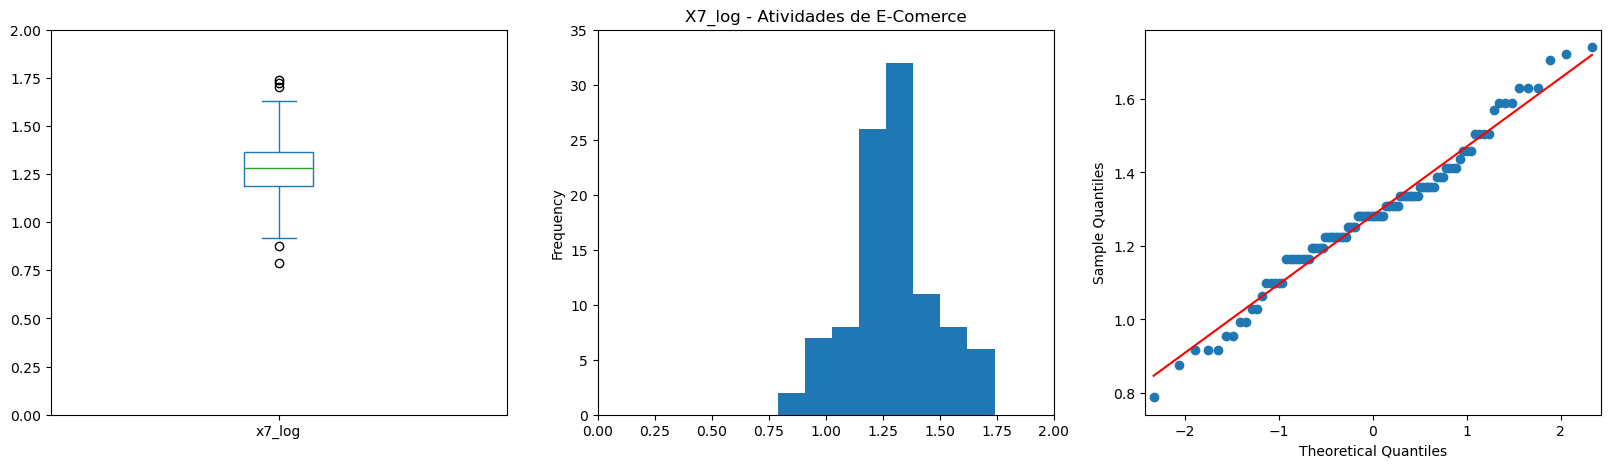

In [424]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x7_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["x7_log"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 2), title='X7_log - Atividades de E-Comerce').set_ylim(0, 35)
qqplot(df["x7_log"], line='s', ax=axes[2])
plt.show()

In [425]:
qui, p_value_qui = st.normaltest(df['x7_log'])

In [426]:
round(qui,3), round(p_value_qui,3)

(0.72, 0.698)

In [427]:
ks, p_value_ks = st.kstest(df['x7_log'], 'norm')

In [428]:
round(ks,6), round(p_value_ks,6)

(0.800243, 0.0)

In [429]:
w, p_value_w = shapiro(df['x7_log'])

In [430]:
round(w,3), round(p_value_w,6)

(0.981, 0.150771)

## Correlação entre os Dados

Matriz de correlações
> - Examinar a matriz de correlações e verificar se existem valores significativos para justificar a utilização da técnica. Caso as correlações entre TODAS as variáveis sejam baixas, talvez a análise fatorial não seja apropriada
> - Espera-se que variáveis que apresentam alta correlação tendem a compartilhar o mesmo fator
> - A matriz de correlação mede a associação linear entre as variáveis por meio do coeficiente de correlação de Pearson
> - Se não houver um número substancial de valores de correlação superiores a 0,30, há fortes indícios de que a utilização da técnica não é apropriada. (HAIR,et all; 2009). Contudo, cabe destacar que depende do tamanho da amostra.

A partir deste ponto, utilizar a variável x7 transformada (x7_log) em lugar de x7. 

### Correlação

Calcula a correlação entre pares de variáveis.

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">corr()</a> <br>
</p>

Contudo, esta função não gera o p-valor (significânca estatísitca)

In [433]:
df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].corr().round(4)

,x6,x7_log,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
x6,1.0000,-0.1524,0.0956,0.1064,-0.0535,0.4775,-0.1518,-0.4013,0.0883,0.0270,0.1043,-0.4931,0.0277
x7_log,-0.1524,1.0000,-0.0107,0.1017,0.4417,-0.0845,0.7835,0.2549,0.0373,-0.0544,0.1367,0.2810,0.1687
x8,0.0956,-0.0107,1.0000,0.0967,-0.0629,0.1926,0.0170,-0.2708,0.7972,-0.0736,0.0801,-0.1861,0.0254
x9,0.1064,0.1017,0.0967,1.0000,0.1969,0.5614,0.2298,-0.1280,0.1404,0.0594,0.7569,0.3945,0.8651
x10,-0.0535,0.4417,-0.0629,0.1969,1.0000,-0.0116,0.5422,0.1342,0.0108,0.0842,0.1842,0.3336,0.2759
x11,0.4775,-0.0845,0.1926,0.5614,-0.0116,1.0000,-0.0613,-0.4949,0.2731,0.0462,0.4244,-0.3780,0.6019
x12,-0.1518,0.7835,0.0170,0.2298,0.5422,-0.0613,1.0000,0.2646,0.1075,0.0316,0.1951,0.3522,0.2716
x13,-0.4013,0.2549,-0.2708,-0.1280,0.1342,-0.4949,0.2646,1.0000,-0.2450,0.0232,-0.1146,0.4711,-0.0729
x14,0.0883,0.0373,0.7972,0.1404,0.0108,0.2731,0.1075,-0.2450,1.0000,0.0352,0.1971,-0.1703,0.1094
x15,0.0270,-0.0544,-0.0736,0.0594,0.0842,0.0462,0.0316,0.0232,0.0352,1.0000,0.0685,0.0941,0.1057


### Correlação 1: Outra função para calcular a correlação e Siginficância

Calcula a correlação entre pares de variáveis. Contudo, a apresentação não é por matriz.

<p> Função Utilizada: <br>
<a href="https://researchpy.readthedocs.io/en/latest/corr_pair_documentation.html">corr_pair()</a> <br>
</p>


In [435]:
rs.correlation.corr_pair(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

,r value,p-value,N
x6 & x7_log,-0.1524,0.1301,100
x6 & x8,0.0956,0.3441,100
x6 & x9,0.1064,0.2922,100
x6 & x10,-0.0535,0.5972,100
x6 & x11,0.4775,0.0000,100
...,...,...,...
x15 & x17,0.0941,0.3516,100
x15 & x18,0.1057,0.2950,100
x16 & x17,0.4070,0.0000,100
x16 & x18,0.7510,0.0000,100


### Correlação 2: Outra função para calcular a correlação e Siginficância

Calcula a correlação entre pares de variáveis. Contudo, a apresentação não é por matriz.

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html">pearsonr()</a> <br>
</p>


In [437]:
r = st.pearsonr(df["x6"], df["x7_log"])[0].round(4)

In [438]:
r

-0.1524

In [439]:
p_value_r = st.pearsonr(df["x6"], df["x7_log"])[1].round(4)

In [440]:
p_value_r

0.1301

### Correlação - Análise

Observando as correlações entre os pares de variáveis, é possível constatar que existe correlação estatisticamente significante entre vários pares, o que permite prosseguir com a análise fatorial.


### Teste de Esfericidade de Bartlett

> - Avalia a hipótese ( 𝐻_0) de que a matriz das correlações pode ser a matriz identidade com determinante igual a 1
> - Se 𝐻_0 não é rejeitada, as inter-relações entre as variáveis são iguais a 0. As variáveis não estão correlacionadas.  A utilização da AF não é adequado.
> - As variáveis devem apresentar normalidade multivariada.



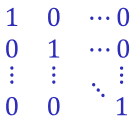

<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_bartlett_sphericity">bartlett</a> <br>
</p>


In [445]:
chi_square_value,p_value = bartlett(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])
print('Qui_Quadrado: ', chi_square_value.round(3))
print('p_valor: ', p_value.round(3))

Qui_Quadrado:  949.461
p_valor:  0.0


### Análise

Teste de esfericidade de Bartlett testa a hipótese de a matriz das correlações ser a matriz identidade (determinante igual a 1)
> - p-value = 0,000
> - Conduz à rejeição da hipótese de a matriz de correlações ser a matriz identidade, evidenciando a correlação entre as variáveis


### KMO

> KMO – Kaiser-Meyer-Olkin (KMO)
>> - Compara as correlações simples com as correlações parciais
>> - Avalia a adequação da amostra quanto ao grau de correlação parcial entre as variáveis:

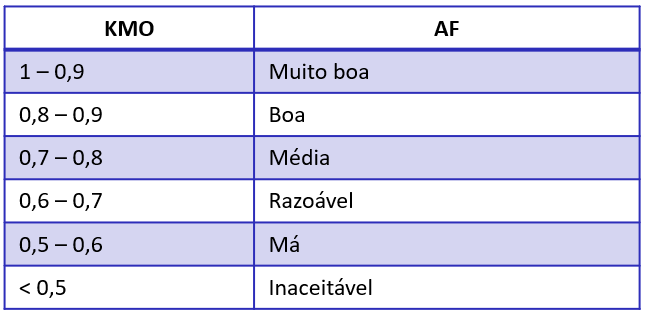

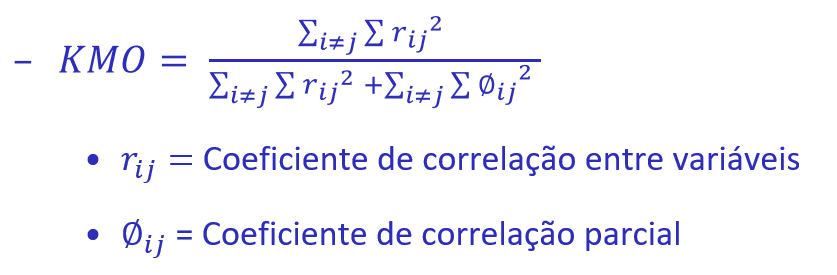

### MSA

> - É uma forma de obter indícios acerca da necessidade de eliminação de determinada variável do modelo;
> - Calcula-se uma Medida de Adequação da Amostra (Measure of Sampling Adequacy – MSA), para cada variável. Inclui apenas os coeficientes que se deseja analisar
> - Quanto maior os valores, melhor a utilização da AF.
> - Baixo valore pode sugerir a exclusão da variável do modelo.


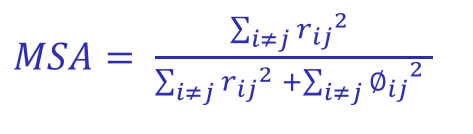

<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_kmo">kmo</a> <br>
</p>


In [452]:
MSA,kmo_model=kmo(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

In [453]:
print('KMO: ', kmo_model.round(3))

KMO:  0.605


In [454]:
MSA

array([0.8753894 , 0.60576254, 0.52648209, 0.87219049, 0.82046176,
       0.44591649, 0.57875527, 0.88460002, 0.52808773, 0.28432035,
       0.85395677, 0.4407795 , 0.53108288])

In [455]:
# Impressão dos valores do MSA
print('MSA')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(MSA[i],3))
    i +=1

MSA
x6 :  0.875
x7_log :  0.606
x8 :  0.526
x9 :  0.872
x10 :  0.82
x11 :  0.446
x12 :  0.579
x13 :  0.885
x14 :  0.528
x15 :  0.284
x16 :  0.854
x17 :  0.441
x18 :  0.531


### Análise - KMO / MSA

KMO: 
> Varia entre 0 e 1, compara as correlações simples com as parciais observadas entre as variáveis
> KMO = 0,6 tora razoável a aplicação da AF, de acordo com quadro de referência apresentado anteriormente

MSA: 
> - Valores abaixo de 0,5 indicam que a variável pode não se ajustar à estrutura definida pelas outras variáveis e, portanto, poderá ser eliminada. Neste caso, elimina-se a variável com MSA mais baixo e recalcula-se as estatísticas de ajuste. Caso o MSA de alguma variável ainda continue abaixo de 0,5, repete-se o procedimento.<br> 
> - Neste caso, a primeira variável a ser eliminada seria a x15, com MSA = 0,28<br> 
> - Opcionalmente, ao invés de eliminar a variável, pode-se deixá-la e observar a sua comunalidade. Se for alta, poderá representar sozinha um fator.


_______________________________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________________________
## Análise Fatorial - Ajuste do Modelo

Análise Fatorial Exploratoria (AFE) é uma técnica estatística utilizada para identificar relacionamentos latentes a partir de um conjunto de variáveis observáveis.

 
<p> Biblioteca utilizada:: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer">factor-analyzer</a> <br>
</p>

Em princípio, a proposta é de retenção de 5 fatores. Contudo, após a execução é necessário avaliar o número recomendado e, caso necessário, executar novamente com o número de fatores edequado.<br>
Os outros parâmetros foram **rotação varimax** e extração os fatores por **Componentes Princiapias**

<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer">FactorAnalyzer</a> <br>
</p>


In [459]:
fea = fa(rotation='varimax',n_factors=5, method='principal')
fea.fit(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

### Comunalidade

> - Comunalidade: Parcela da variância de 𝑋_𝑖que é explicada pelos fatores comuns.

> - Especificidade: Parcela de variância de 𝑋_𝑖 que não é explicada pelos fatores

> - A comunalidade é um índice da variabilidade total explicada por todos os fatores para cada variável

> - Comunalidade + Especificidade = 1


<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_communalities">get_communalities</a> <br>
</p>


In [461]:
comunalidade = fea.get_communalities().round(3)

In [462]:
comunalidade

array([0.687, 0.804, 0.893, 0.882, 0.591, 0.841, 0.852, 0.592, 0.901,
       0.975, 0.772, 0.891, 0.925])

In [463]:
# Impressão dos valores do MSA
print('Comunalidades')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(comunalidade[i],3))
    i +=1

Comunalidades
x6 :  0.687
x7_log :  0.804
x8 :  0.893
x9 :  0.882
x10 :  0.591
x11 :  0.841
x12 :  0.852
x13 :  0.592
x14 :  0.901
x15 :  0.975
x16 :  0.772
x17 :  0.891
x18 :  0.925


### Análise - Comunalidade

> - A comunalidade representa a variância total explicada pelos fatores em cada variável. A comunalidade inicial é igual a 1 e, após a extração, variam entre 0 e 1. <br>
> - Neste caso, todas as variáveis possuem forte relação com os fatores retidos pois as comunalidades são altas.



### Autovalores e Fatores Retidos

> - Critério da raiz latente:<br>
>> - Apenas fatores que têm autovalores (eigenvalues) maiores que 1 são considerados significantes, os demais são descartados; Isto porque, no mínimo, o componente deve explicar a variância de uma variável utilizada no modelo (média 0 e desvio 1)<br>
>> - Os eigenvalues mostram a variância explicada por cada fator, ou seja, quanto cada fator consegue explicar da variância total<br>


<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_eigenvalues">get_eigenvalues</a> <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_factor_variance">get_factor_variance</a> <br></p>




In [466]:
ev, v = fea.get_eigenvalues()

In [467]:
autovalor, var, var_acum = fea.get_factor_variance()

In [468]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Variância Total Explicada')

print('Componente', '| Auovalor', '| Variância(%)', '| Variância Acum.', '| Autovalor Rotacionado', '| Variância Rotacionada', '| Variância Acum. Rot')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
var_acum1 = 0
while i < len(variaveis):
    var_acum1 += ev[i]/len(variaveis)
    if i < len(autovalor):
        print(i+1, '          ', round(ev[i],3), '    ', round(ev[i]/len(variaveis) * 100,3), '       ', round(var_acum1 * 100,3),'         ', 
              round(autovalor[i], 3), '                   ', round(var[i]*100, 3), '                 ', round(var_acum[i]*100, 3) )
    else:
        print(i+1, '          ', round(ev[i],3),'    ',  round(ev[i]/len(variaveis) * 100,3), '        ', round(var_acum1 * 100,3) )
    i +=1

         Variância Total Explicada
Componente | Auovalor | Variância(%) | Variância Acum. | Autovalor Rotacionado | Variância Rotacionada | Variância Acum. Rot
1            3.545      27.271         27.271           3.14                     24.156                   24.156
2            3.024      23.263         50.533           2.305                     17.728                   41.884
3            1.742      13.402         63.935           1.864                     14.336                   56.22
4            1.285      9.887         73.822           2.264                     17.412                   73.632
5            1.009      7.764         81.586           1.034                     7.954                   81.586
6            0.608      4.673          86.259
7            0.546      4.198          90.457
8            0.446      3.428          93.885
9            0.282      2.167          96.052
10            0.209      1.611          97.663
11            0.168      1.289          98.9

### Análise - Fatores Retidos e Variância Explicada

> - Com base regra de retenção de fatores com valores superiores a 1, foram retidos 5 fatores que conseguem explicar 81,586% da variância dos dados originais.<br> 
> - Antes da rotação, o primeiro componente explica 27,271% da variância dos dados e após a rotação, 24,156%. <br>
> - A tabela mostra também o percentual da variância explicada por fator antes e depois da rotação




### Fatores Retidos - Scree Plot

> - Critério do Gráfico Scree:
>> - Esse teste é usado para identificar o número ótimo de fatores que podem ser extraídos antes que a quantia de variância única comece a dominar a estrutura de variância comum.
>> - Raiz latente, ou eigenvalues, no eixo Y e o número de fatores no eixo X, de acordo com a ordem de extração. A partir do ponto que o gráfico passa a se tornar mais horizontal, reflete um indicativo do número máximo de fatores a serem extraídos.
>> - Neste caso, reforça a retenção dos 5 fatores. 



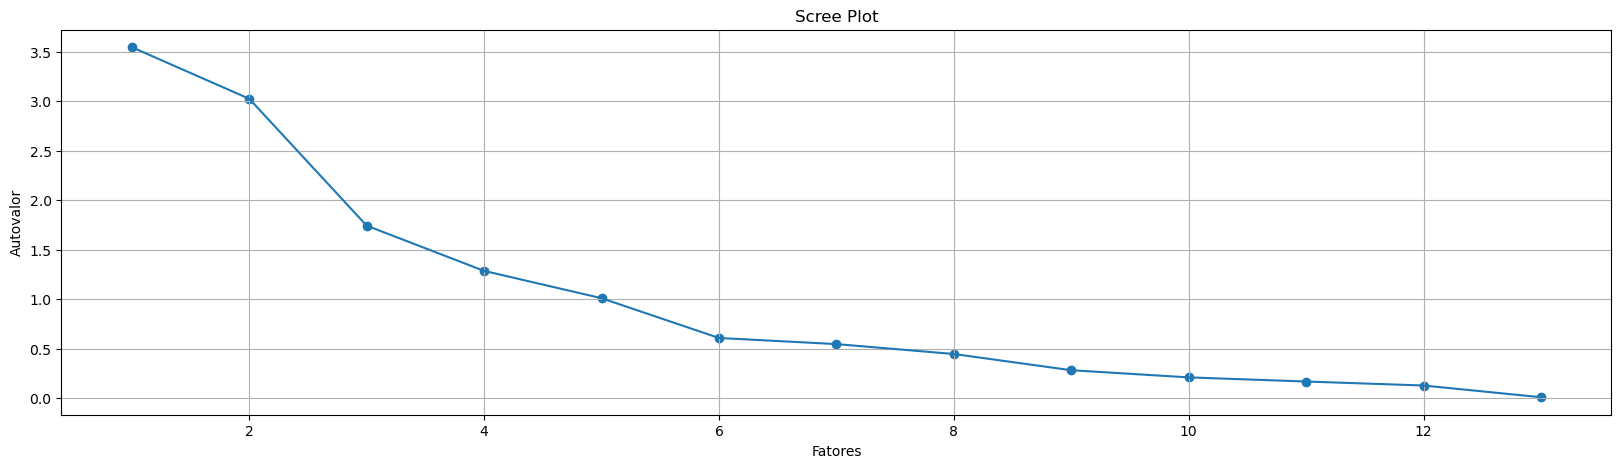

In [471]:
# Cria o Scree Plot utilizando-se MAtPlotLib
plt.scatter(range(1,14),ev)
plt.plot(range(1,14),ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

### Carga Fatorial e Interpretação dos Fatores

> - Interpretar e nomear os fatores por meio das cargas fatoriais
> - Em geral, considera-se cargas fatoriais maiores que 0,30.
> - Cargas superiores a 0,40 são consideradas importantes
> - Maiores que 0,50 são consideradas estatisticamente significativas
> - Cargas fatoriais significantes dependem do tamanho da amostra
> - Os valores da tabela apresenta orientações para identificação de cargas fatoriais significantes e tamanho de amostras ao nível de 5%.
> - O valor da carga fatorial representa a quantia de variância total da variável explicada pelo fator.




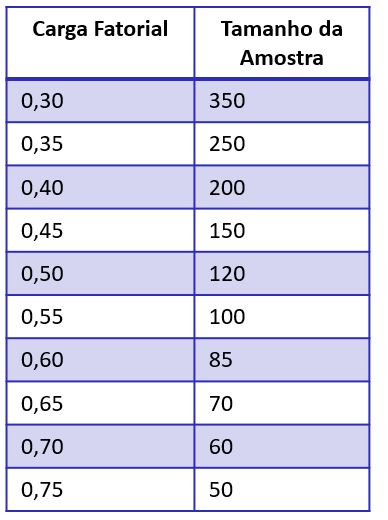

<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.confirmatory_factor_analyzer.ConfirmatoryFactorAnalyzer.loadings_">loadings_</a> <br>
</p>

In [475]:
carga_fatorial = fea.loadings_.round(3)

In [476]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Matriz de Componente Rotativa')
print('                      Componentes (', len(carga_fatorial[0]), ')')
print('Variável')

variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], '      ', carga_fatorial[i])
    i +=1

         Matriz de Componente Rotativa
                      Componentes ( 5 )
Variável
x6        [ 0.039  0.824 -0.047 -0.01   0.055]
x7_log        [ 0.033 -0.128  0.028  0.877 -0.127]
x8        [ 0.025  0.101  0.936 -0.025 -0.068]
x9        [0.929 0.077 0.053 0.099 0.003]
x10        [ 0.163 -0.041 -0.068  0.731  0.153]
x11        [ 0.56   0.713  0.134 -0.044  0.007]
x12        [ 0.135 -0.156  0.076  0.896 -0.008]
x13        [-0.117 -0.686 -0.232  0.229  0.035]
x14        [0.1   0.123 0.932 0.058 0.057]
x15        [ 0.051 -0.003 -0.008  0.013  0.986]
x16        [0.869 0.017 0.091 0.094 0.021]
x17        [ 0.49  -0.756 -0.148  0.225  0.081]
x18        [0.945 0.024 0.001 0.166 0.057]


### Composição dos Fatores

As variáveis são agrupadas em fatores a partir da carga fatorial. Ao analisar a linha, a variável se agrupará ao fator cuja carga fatorial seja a maior, em valor absoluto (módulo da carga fatorial).<br>
Para este exemplo, os fatores foram compostos por:

> - Fator1
>> - x9, x16, x18
> - Fator2
>> - x6, x11, x13, x17
> - Fator 3
>> - x7, x10, x12
> - Fator4
>> - x8, x14, 
> - Fator5
>> - x15


### Cálculo dos Escores Fatoriais para cada um dos elementos da amostra

Gera os scores para os fatores para cada um dos indivíduos da amostra ou para novos casos.

<p> Função Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.confirmatory_factor_analyzer.ConfirmatoryFactorAnalyzer.transform">tansform</a> <br>
</p>


In [479]:
fatores = fea.transform(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

In [480]:
# Transforma os fatores gerados para cada observação em um novo Data Frame
df_fat=pd.DataFrame(fatores, columns=['Fat1', 'Fat2', 'Fat3','Fat4','Fat5']) 

In [481]:
df_fat.head(3)

,Fat1,Fat2,Fat3,Fat4,Fat5
0,0.223185,0.236492,-1.898413,0.769601,-0.581145
1,1.269256,0.793456,-0.648755,-1.701355,-0.765869
2,0.702988,1.470056,-0.008461,0.614835,-0.221153


<p> Concatena a base original <b>HBAT</b> com os fatores recém-calculados e armazena o resultado na base <b>HBAT</b>:
<p> Função utilizada:<p>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">concat()</a>
</p>

In [483]:
df = pd.concat([df, df_fat], axis=1).reindex(df.index)

In [484]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x7_log,Fat1,Fat2,Fat3,Fat4,Fat5
0,1,Entre 1 e 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,Sim,1.360977,0.223185,0.236492,-1.898413,0.769601,-0.581145
1,2,Acima de 5 Anos,Indústria de Jornal,Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,Não,0.993252,1.269256,0.793456,-0.648755,-1.701355,-0.765869
2,3,Acima de 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,Sim,1.223775,0.702988,1.470056,-0.008461,0.614835,-0.221153


<p> Salva o arquivo em formato <b>csv</b>:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html">to_csv()</a>
</p>

In [486]:
df.to_csv('HBAT_FATORIAL.csv', encoding='utf-8', decimal=',')